## Effect of batch size notebook

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [3]:
series = 24
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,1,60,24,testing static trace,1
1,2,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,10,60,24,testing static trace,1
2,3,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,20,60,24,testing static trace,1
3,4,6-mlserver-mock,mock-one,0.0,4,8Gi,1,1,40,60,24,testing static trace,1
4,5,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,1,60,24,testing static trace,1
5,6,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,10,60,24,testing static trace,1
6,7,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,20,60,24,testing static trace,1
7,8,6-mlserver-mock,mock-one,0.0,4,8Gi,5,1,40,60,24,testing static trace,1
8,9,6-mlserver-mock,mock-one,0.0,4,8Gi,10,1,1,60,24,testing static trace,1
9,10,6-mlserver-mock,mock-one,0.0,4,8Gi,10,1,10,60,24,testing static trace,1


In [4]:
results.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [5]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '10'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '5'],
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 25,
    'series_meta': 'testing static trace',
    'timeout': 60,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 1000]},
    'workload_type': 'static'}


,experiment_id,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1,0.0,1,4,1,0.011538,0.144655,0.007719,0.009298
1,2,0.0,1,4,10,0.011299,0.330229,0.008454,0.174586
2,3,0.0,1,4,20,0.012000,7.072800,0.008679,5.315818
3,4,0.0,1,4,40,0.018568,41.486617,0.009020,5.290336
4,5,0.0,5,4,1,0.032618,1.027526,0.010919,0.017495
5,6,0.0,5,4,10,0.026857,0.770311,0.016821,0.317850
6,7,0.0,5,4,20,0.047434,31.165133,0.018601,6.119334
7,8,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612
8,9,0.0,10,4,1,0.012120,1.093901,0.009518,0.016424
9,10,0.0,10,4,10,0.089203,1.338578,0.035118,0.586460


Text(0, 0.5, 'Latency (seconds)')

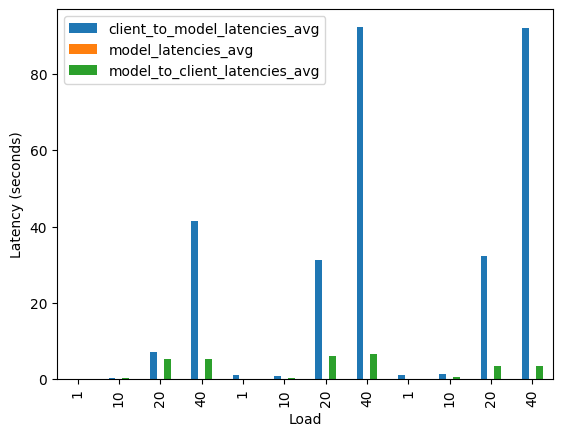

In [6]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['experiment_id', 'model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,experiment_id,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,13,0.5,1,4,1,0.512352,0.210082,0.508969,0.013629
1,14,0.5,1,4,10,0.515319,7.359817,0.509010,0.066546
2,15,0.5,1,4,20,0.511021,7.488019,0.508997,0.157477
3,16,0.5,1,4,40,0.509837,7.603411,0.508640,0.572022
4,17,0.5,5,4,1,0.514106,1.011035,0.510454,0.020535
5,18,0.5,5,4,10,0.523583,4.884360,0.517401,0.373680
6,19,0.5,5,4,20,0.523824,38.923981,0.517443,1.134062
7,20,0.5,5,4,40,0.530527,107.753737,0.517841,0.906017
8,21,0.5,10,4,1,0.512857,1.017344,0.510316,0.019802
9,22,0.5,10,4,10,0.564354,1.377840,0.534387,0.443926


Text(0, 0.5, 'Latency (seconds)')

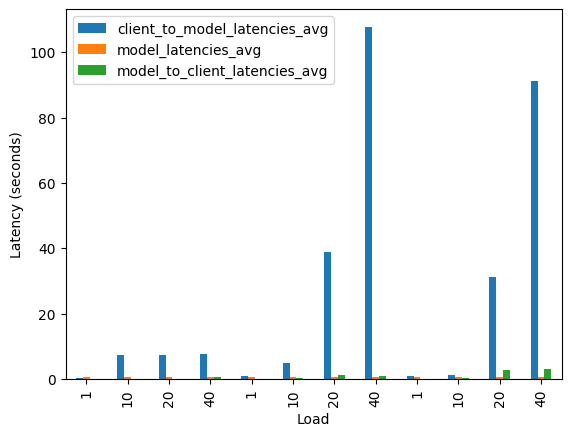

In [7]:
model_variant = 0.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['experiment_id', 'model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1.0,1,4,1,1.011526,1.552666,1.010016,0.016601
1,1.0,1,4,10,1.010921,6.990462,1.008747,0.127168
2,1.0,1,4,20,1.009585,6.857028,1.008712,0.111568
3,1.0,1,4,40,1.015556,6.922370,1.009713,0.457565
4,1.0,5,4,1,1.023641,1.070742,1.011353,0.054171
5,1.0,5,4,10,1.032459,7.092944,1.018729,0.235423
6,1.0,5,4,20,1.023775,7.061517,1.018459,1.260066
7,1.0,5,4,40,1.037128,7.885922,1.018855,1.281852
8,1.0,10,4,1,1.013113,1.077626,1.010631,0.040471
9,1.0,10,4,10,1.054331,4.857389,1.033712,0.490680


Text(0, 0.5, 'Latency (seconds)')

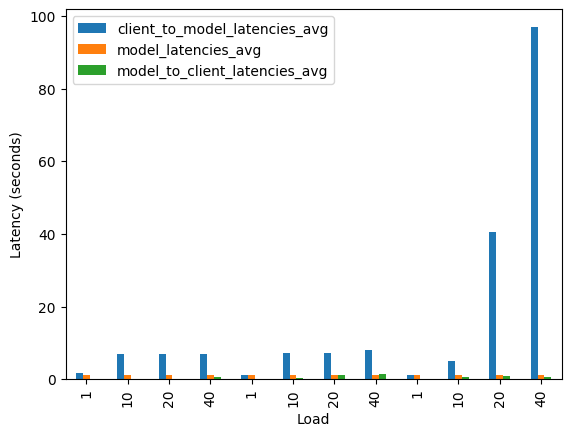

In [8]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1.5,1,4,1,1.510249,7.761054,1.509290,0.018381
1,1.5,1,4,10,1.509875,6.946739,1.508987,0.068808
2,1.5,1,4,20,1.515261,6.394397,1.509834,0.206498
3,1.5,1,4,40,1.510005,6.408749,1.508762,0.330017
4,1.5,5,4,1,1.515609,1.252524,1.511309,0.027156
5,1.5,5,4,10,1.538193,6.909880,1.520653,0.213754
6,1.5,5,4,20,1.526544,6.914498,1.519559,0.864818
7,1.5,5,4,40,1.547570,7.097851,1.522760,1.094608
8,1.5,10,4,1,1.519702,1.236252,1.511578,0.024573
9,1.5,10,4,10,1.581063,7.110468,1.537276,0.420761


Text(0, 0.5, 'Latency (seconds)')

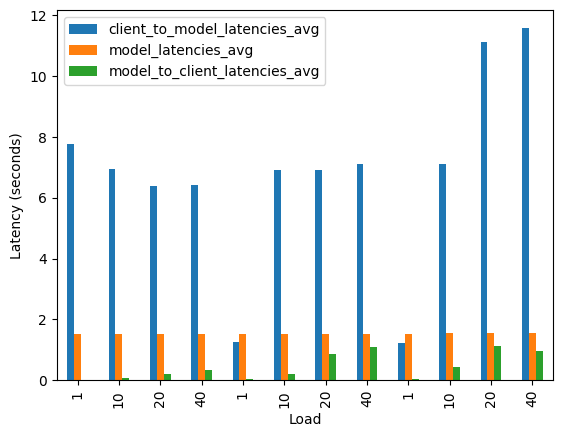

In [9]:
model_variant = 1.5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [10]:
results = loader.read_results()
experiment_id = 8

model_variant = 1
experiment_ids = key_config_df[
    key_config_df['experiment_id'] == experiment_id]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)

latencies, timeout_count = loader.latency_calculator(
    loader.flatten_results(results[str(experiment_id)]['responses']))
print(f'{timeout_count=}')
print(pd.DataFrame(latencies))

,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612


timeout_count=44
      client_to_model_latencies  model_latencies  model_to_client_latencies
0                      4.517413         0.016135                   1.051598
1                      5.198128         0.016308                   2.536516
2                      5.183739         0.016308                   2.531532
3                      0.780901         0.022212                   0.067724
4                      3.068623         0.016296                   1.536479
...                         ...              ...                        ...
2351                 179.218722         0.018703                   0.143705
2352                 177.937227         0.016072                   1.414754
2353                 177.465177         0.016526                   1.878260
2354                 178.743598         0.016621                   0.570757
2355                 177.463582         0.016526                   1.876095

[2356 rows x 3 columns]


In [31]:
responses = loader.flatten_results(results[str(experiment_id)]['responses'])
time.ctime(json.loads(responses[0]['outputs'][0]['data'][0])['time']['arrival_mock_one'])

'Thu Nov  3 17:05:13 2022'

,experiment_id,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,1,0.0,1,4,1,0.011538,0.144655,0.007719,0.009298
1,2,0.0,1,4,10,0.011299,0.330229,0.008454,0.174586
2,3,0.0,1,4,20,0.012000,7.072800,0.008679,5.315818
3,4,0.0,1,4,40,0.018568,41.486617,0.009020,5.290336
4,5,0.0,5,4,1,0.032618,1.027526,0.010919,0.017495
5,6,0.0,5,4,10,0.026857,0.770311,0.016821,0.317850
6,7,0.0,5,4,20,0.047434,31.165133,0.018601,6.119334
7,8,0.0,5,4,40,0.027211,92.269079,0.017031,6.487612
8,9,0.0,10,4,1,0.012120,1.093901,0.009518,0.016424
9,10,0.0,10,4,10,0.089203,1.338578,0.035118,0.586460


Text(0, 0.5, 'Latency (seconds)')

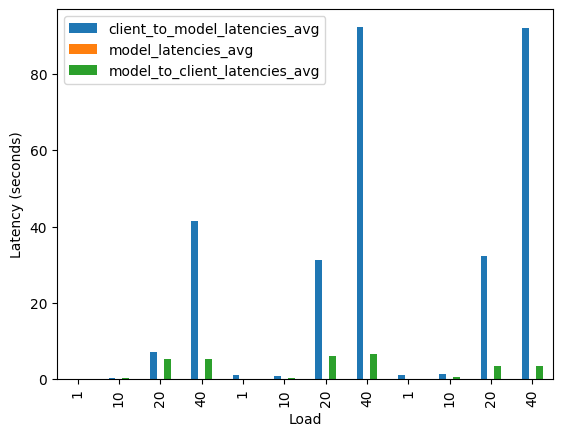

In [35]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['experiment_id', 'model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [34]:
import time
experiment_id = 4
responses = loader.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    sending_time = time.ctime(response['time']['sending_time'])
    model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
    arrival_time = time.ctime(response['time']['arrival_time'])
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")


sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:46 2022, arrival time: Thu Nov  3 16:50:46 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:45 2022, arrival time: Thu Nov  3 16:50:46 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:54 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:53 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:47 2022, arrival time: Thu Nov  3 16:50:53 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:46 2022, arrival time: Thu Nov  3 16:50:48 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:48 2022, arrival time: Thu Nov  3 16:50:54 2022
sending time: Thu Nov  3 16:50:45 2022, model_arrival_time: Thu Nov  3 16:50:47 2022, arrival time: Thu Nov  3 16:50:52 2022
